In [2]:
%pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import os
import re
from tqdm import tqdm
import pickle
import numpy as np
from collections import Counter
import random
from matplotlib import pyplot as plt

# Experimenting

In [ ]:
example = pd.read_pickle("./shared/to_vid/datasets/HolyDataset.pkl")
# shape of data
# x_train = HolyDataset[0]
# x_test = HolyDataset[1]
# y_train = HolyDataset[2]
# y_test = HolyDataset[3]
# labels = HolyDataset[4]

In [22]:
df = pd.read_pickle("./Energy_graph/data/processed/REFIT.pkl")

In [26]:
# go over all datasets take 20% of the households rounded down from each dataset and use them for evaluation and use rest for training
# if only one household is in dataset use it for training
# if two,three,four households are in dataset use one for evaluation and rest for training
# labels potentially useless as we will try to predict all appliances
# let's say bellow 2w device is off and above 2w device is on so in kWh with 8s sampling rate we have 0.000004kWh as threshold 4.4e-06
# time_window stand for rows in dataset so all datasets need to have same sampling rate !!!!
# shape the data as an array of tuples of shape (X_train, X_test, Y_train, Y_test) where X_train is an array of shape (time_widow) and Y_train is an array of shape (time_window) and X_test is an array of shape (time_window) and Y_test is an array of shape (time_window)
for file in os.listdir("./Energy_graph/data/training_data/"):
    if not file.endswith(".pkl"):
        continue
    df = pd.read_pickle("./Energy_graph/data/training_data/" + file)
    print(len(list(df.keys())))

6
6
20
5
1
22
5
1
2
1
1
1


In [12]:
data = pd.read_pickle("./Energy_graph/data/processed_all_values.pkl")
data["HES_1"].keys()

Index(['dish washer', 'running machine', 'ev', 'microwave', 'fridge',
       'air exchanger', 'oven', 'whirlpool bath', 'washing machine', 'ac',
       'dryer', 'towel dryer', 'aggregate'],
      dtype='object')

<AxesSubplot: xlabel='date'>

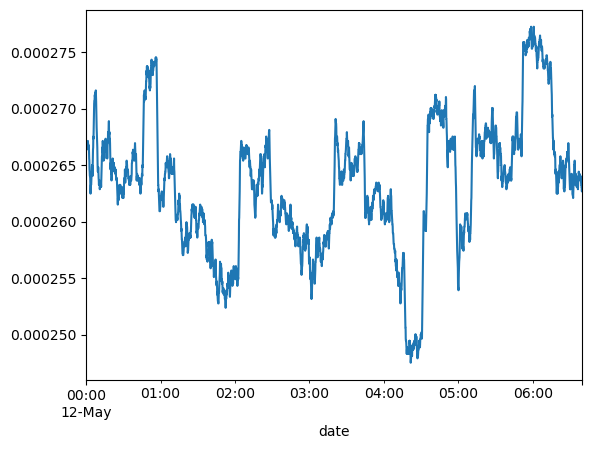

In [19]:
data["HES_1"]["washing machine"][:3000].rolling(window=10).mean().plot()

In [32]:
df = data["REFIT_1"]["aggregate"]
for device in data["REFIT_1"]:
    if device == "aggregate":
        continue
    df = pd.concat([df, data["REFIT_1"][device]], axis=1)


,aggregate,fridge,chest freezer,upright freezer,tumble dryer,washing machine,dishwasher,computer site,television site,electric heater
Time,,,,,,,,,,
2013-10-09 13:06:16,0.001162,0.000164,0.0000,0.000153,0.0,0.0,0.0,0.0,0.0,0.000002
2013-10-09 13:06:24,0.001169,0.000167,0.0000,0.000153,0.0,0.0,0.0,0.0,0.0,0.000002
2013-10-09 13:06:32,0.001169,0.000167,0.0000,0.000153,0.0,0.0,0.0,0.0,0.0,0.000002
2013-10-09 13:06:40,0.001200,0.000164,0.0000,0.000151,0.0,0.0,0.0,0.0,0.0,0.000002
2013-10-09 13:06:48,0.001200,0.000164,0.0000,0.000151,0.0,0.0,0.0,0.0,0.0,0.000002
...,...,...,...,...,...,...,...,...,...,...
2015-07-10 11:56:00,0.000400,0.000000,0.0001,0.000000,0.0,0.0,0.0,0.0,0.0,0.000002
2015-07-10 11:56:08,0.000416,0.000000,0.0001,0.000000,0.0,0.0,0.0,0.0,0.0,0.000002
2015-07-10 11:56:16,0.000402,0.000000,0.0001,0.000000,0.0,0.0,0.0,0.0,0.0,0.000002


In [34]:

for c in df.columns:
    if c == "aggregate":
        continue

    df[c] = df[c].apply(lambda x: 1 if x > 4.4e-5 else 0)
    

In [2]:
df = pd.read_pickle("./Energy_graph/data/processed_all.pkl")

In [8]:
df["REDD_3"].head(50)

,aggregate,fridge,waste disposal unit,dish washer,electric furnace,microwave,smoke alarm,washer dryer
2011-04-16 01:11:20-04:00,0.000000,0,0,0,0,0,0,0
2011-04-16 01:11:28-04:00,0.000700,1,0,0,0,0,0,0
2011-04-16 01:11:36-04:00,0.000703,1,0,0,0,0,0,0
2011-04-16 01:11:44-04:00,0.000719,1,0,0,0,0,0,0
2011-04-16 01:11:52-04:00,0.000704,1,0,0,0,0,0,0
2011-04-16 01:12:00-04:00,0.000702,1,0,0,0,0,0,0
2011-04-16 01:12:08-04:00,0.000705,1,0,0,0,0,0,0
2011-04-16 01:12:16-04:00,0.000704,1,0,0,0,0,0,0
2011-04-16 01:12:24-04:00,0.000704,1,0,0,0,0,0,0
2011-04-16 01:12:32-04:00,0.000704,0,0,0,0,0,0,0


In [59]:
time_window = 2550
windows = []
upper_bound = pd.Timedelta(seconds=32)  
for i in range(0, len(df) - time_window, time_window + 1):
    window = df.iloc[i:i + time_window]
    windows.append(window)






In [60]:

windows[0]
count = 0
test = 0

# this constraint can be relaxed in the future for now we will use it to filter out windows that have gaps of more than 32 seconds for eg. in the future if a window has only 1 gap of one minute we can still use that window

for window in windows:
    test += 1
    time_diffs = window.index.to_series().diff().dropna()
    if  (time_diffs <= upper_bound).all():
        count += 1
    # else:
        # continue
        # print(window.index.to_series().diff().dropna().unique())
    # print(len(window.index.to_series().diff().dropna().unique()))

len(windows) - count


556

# Balancing the data

In [16]:
data = pd.read_pickle("./Energy_graph/data/processed_all_values_watts.pkl")


### Functions

In [7]:
def preprocess_string(string : str) -> str:
    string = string.lower().strip()
    string = re.sub(' +', ' ', string)
    string = string.replace("_", " ")
    string = string.replace("-", " ")
    string = string.replace("&", " ")
    string = string.split("(")[0]
    string = string.split("#")[0]

    string = string.strip()

    # handle known synoynms
    synonyms = {
        "refrigerator": "fridge",
        "vaccumcleaner": "vacuum cleaner",
        "breadmaker": "bread maker",
      
        
    }
    if "freezer" in string:
        string = "fridge"

    if string in synonyms:
        string = synonyms[string]

    if 'hi fi' in string:
        string = "audio system"

    if "router" in string:
        string = "router"

    if "treadmill" in string:
        string = "running machine"
        

    if "laptop" in string:
        string = "laptop"
    
    if "server" in string:
        string = "server"

    if "monitor" in string and not "baby" in string:
        string = "monitor"
    # special cases
    if "computer" in string and "charger" not in string:
        string = "pc"

    if "tv" in string:
        string = "television"

    if "television" in string:
        string = "television"

    if "macbook" in string:
        string = "laptop"
        
    if "car charger" == string:
        string = "ev"
    
    if "toast" in string:
        string = "toaster"
    
    if "modem" in string:
        string = "router"

    # we treat all audio devices as speakers so subwoofer is also a speaker
    if "subwoofer" in string:
        string = "speaker"

    if "speaker" in string:
        string = "speaker"

    if "iron" in string and "soldering" not in string:
        string = "iron"

    
    if "coffeemachine" in string:
        string = "coffee machine"
    if "coffee maker" in string:
        string = "coffee machine"

    if "dishwasher" in string:
        string = "dish washer"
    if "air conditioner" in string:
        string = "ac"

    if "air conditioning" in string:
        string = "ac"
    
    string = re.sub(' +', ' ', string)
    string = re.sub(r'\d+', '', string)
    return string.strip()



def sample_normal_within_range(mu=10, sigma=5, a=2, b=20, n=1):
    samples = []
    while len(samples) < n:
        value = round(np.random.normal(mu, sigma))
        if a <= value <= b:
            samples.append(value)
    return np.array(samples)[0]


count_all=0
count_skipped=0
def process_data(df : pd.DataFrame, hours, time=False) -> list:
    global count_skipped # debug
    global count_all
    time_window = int((hours * 60 * 60) / 8) # 12h  
    

    df = df.resample("8S").fillna(method="nearest", limit=4)
    df.fillna(0, inplace=True)
    if time:
        df["hour"] = df.index.hour
        df["day"] = df.index.dayofweek
        
    df.dropna(inplace=True)
    windows = []
    for i in range(0, len(df) - time_window, time_window + 1):
        count_all += 1
        window = df.iloc[i:i + time_window]
        
        # how much total time can be missing in the window
        margin = 2
        # check how many gaps are in window
        length = abs((window.index.max() - window.index.min()).total_seconds())

        if length > (hours+2) * 60 * 60:
            print("skipping window with too much missing data Missing: ", length/60/60 - 12 , "h")

            continue

        if length < (hours/2) * 60 * 60:
            print("skipping window with too much missing data Missing: ", length/60/60 - 12 , "h")

            continue
        if window.max().max() < 5:
            # print("skipping window with zeros: ", window.max().max())
            count_skipped += 1
            continue
        window.reset_index(drop=True, inplace=True)
        
        windows.append(window)
    
    return windows


### Add hour/day

In [8]:

devices_processed = {}
path = "./Energy_graph/data/processed_watts/"
for dataset in tqdm(os.listdir(path)):
    if not dataset.endswith(".pkl"):
        continue
    # if "HES" not in dataset:
    #     continue
    data = pd.read_pickle(path + dataset)
    print(dataset)
    for house in data:
        for device in data[house]:
            if device == "aggregate":
                continue
            name = preprocess_string(device)
            if name not in devices_processed:
                devices_processed[name] = []
            curr_device = process_data(data[house][device], 6, time=True)
            devices_processed[name].extend(curr_device)
    # break        

print(count_skipped, count_all, count_skipped/count_all*100)

  0%|          | 0/13 [00:00<?, ?it/s]

UKDALE_clean.pkl


 15%|█▌        | 2/13 [03:00<16:35, 90.48s/it]

ENERTALK.pkl


 23%|██▎       | 3/13 [04:35<15:23, 92.34s/it]

IAWE_clean.pkl


 31%|███       | 4/13 [04:37<08:45, 58.39s/it]

HEART_clean.pkl


 38%|███▊      | 5/13 [04:42<05:19, 40.00s/it]

REFIT_clean.pkl


 46%|████▌     | 6/13 [09:27<14:08, 121.17s/it]

DRED_clean.pkl


 54%|█████▍    | 7/13 [09:31<08:22, 83.69s/it] 

DEDDIAG_clean.pkl


 77%|███████▋  | 10/13 [09:37<01:48, 36.23s/it]

REDD_clean.pkl


 85%|████████▍ | 11/13 [09:41<00:58, 29.32s/it]

ECO_clean.pkl


 92%|█████████▏| 12/13 [10:13<00:29, 29.88s/it]

HES_clean.pkl


100%|██████████| 13/13 [10:17<00:00, 47.50s/it]

0 684568 0.0


In [11]:
devices_processed["pc"][0]
import pickle
with open("./Energy_graph/data/device_windows/processed_watts_dayHour.pkl", "wb") as f:
    pickle.dump(devices_processed, f)

,1,hour,day
0,114.0,16,6
1,114.0,16,6
2,118.0,16,6
3,115.0,16,6
4,115.0,16,6
...,...,...,...
2695,116.0,22,6
2696,114.0,22,6
2697,116.0,22,6
2698,119.0,22,6


### Random device combinations

In [3]:

devices_processed = {}
path = "./Energy_graph/data/processed_watts/"
for dataset in tqdm(os.listdir(path)):
    if not dataset.endswith(".pkl"):
        continue
    # if "HES" not in dataset:
    #     continue
    data = pd.read_pickle(path + dataset)
    print(dataset)
    for house in data:
        for device in data[house]:
            if device == "aggregate":
                continue
            name = preprocess_string(device)
            if name not in devices_processed:
                devices_processed[name] = []
            curr_device = process_data(data[house][device], 6)
            devices_processed[name].extend(curr_device)
    # break        

print(count_skipped, count_all, count_skipped/count_all*100)

  0%|          | 0/13 [00:00<?, ?it/s]

UKDALE_clean.pkl


 15%|█▌        | 2/13 [01:35<08:44, 47.71s/it]

ENERTALK.pkl


 23%|██▎       | 3/13 [02:50<09:52, 59.27s/it]

IAWE_clean.pkl


 31%|███       | 4/13 [02:51<05:37, 37.54s/it]

HEART_clean.pkl


 38%|███▊      | 5/13 [02:54<03:24, 25.56s/it]

REFIT_clean.pkl


 46%|████▌     | 6/13 [06:59<11:28, 98.29s/it]

DRED_clean.pkl


 54%|█████▍    | 7/13 [07:02<06:45, 67.63s/it]

DEDDIAG_clean.pkl


 77%|███████▋  | 10/13 [07:06<01:27, 29.15s/it]

REDD_clean.pkl


 85%|████████▍ | 11/13 [07:08<00:46, 23.35s/it]

ECO_clean.pkl


 92%|█████████▏| 12/13 [07:28<00:22, 22.50s/it]

HES_clean.pkl


100%|██████████| 13/13 [07:30<00:00, 34.69s/it]

371076 684568 54.20586413621437


In [4]:
labels = []
for device in devices_processed:
        print(device, len(devices_processed[device]))
        labels.append(device)





pc 21394
coffee machine 2315
electric stove 337
server 530
running machine 615
electric oven 259
iron 152
toaster 8244
monitor 2764
network attached storage 279
speaker 3482
television 39104
washer dryer 2842
microwave 15790
kettle 19836
audio amplifier 2977
games console 5
hair dryer 692
fridge 87503
dish washer 9793
vacuum cleaner 374
cooker 214
laptop 4117
router 9174
washing machine 11729
rice cooker 3038
external hard disk 6107
audio system 5951
fan 301
tablet computer charger 234
soldering iron 9
radio 7
usb hub 2080
printer 414
htpc 5605
oven 5326
baby monitor 49
mobile phone charger 1414
bouncy castle pump 2197
solar thermal pumping station 3307
hair straighteners 433
charger 777
boiler 6112
food processor 2737
bread maker 488
projector 41
electric space heater 277
kimchi fridge 4376
water purifier 514
ac 574
motor 79
minioven 101
watercooker 154
heater 83
gaming pc 101
tumble dryer 3594
electric heater 951
food mixer 25
vivarium 1787
pond pump 1076
dryer 802
blender 762
oven e

In [6]:
import pickle
with open("./Energy_graph/data/device_windows/processed_watts.pkl", "wb") as f:
    pickle.dump(devices_processed, f)

In [10]:
import pickle 
with open("./Energy_graph/data/labels_new.pkl", "wb") as f:
    pickle.dump(labels, f)

In [39]:
data = pd.read_pickle("./Energy_graph/data/tracebase/devices_data.pkl")

for k in data:
    devices_processed[k].extend(data[k])

In [139]:
sample_normal_within_range()

25

In [12]:
import pickle
with open("./Energy_graph/data/training_data/synthetic/devices_processed_2700_new.pkl", "wb") as f:
    pickle.dump(devices_processed, f, protocol=pickle.HIGHEST_PROTOCOL)

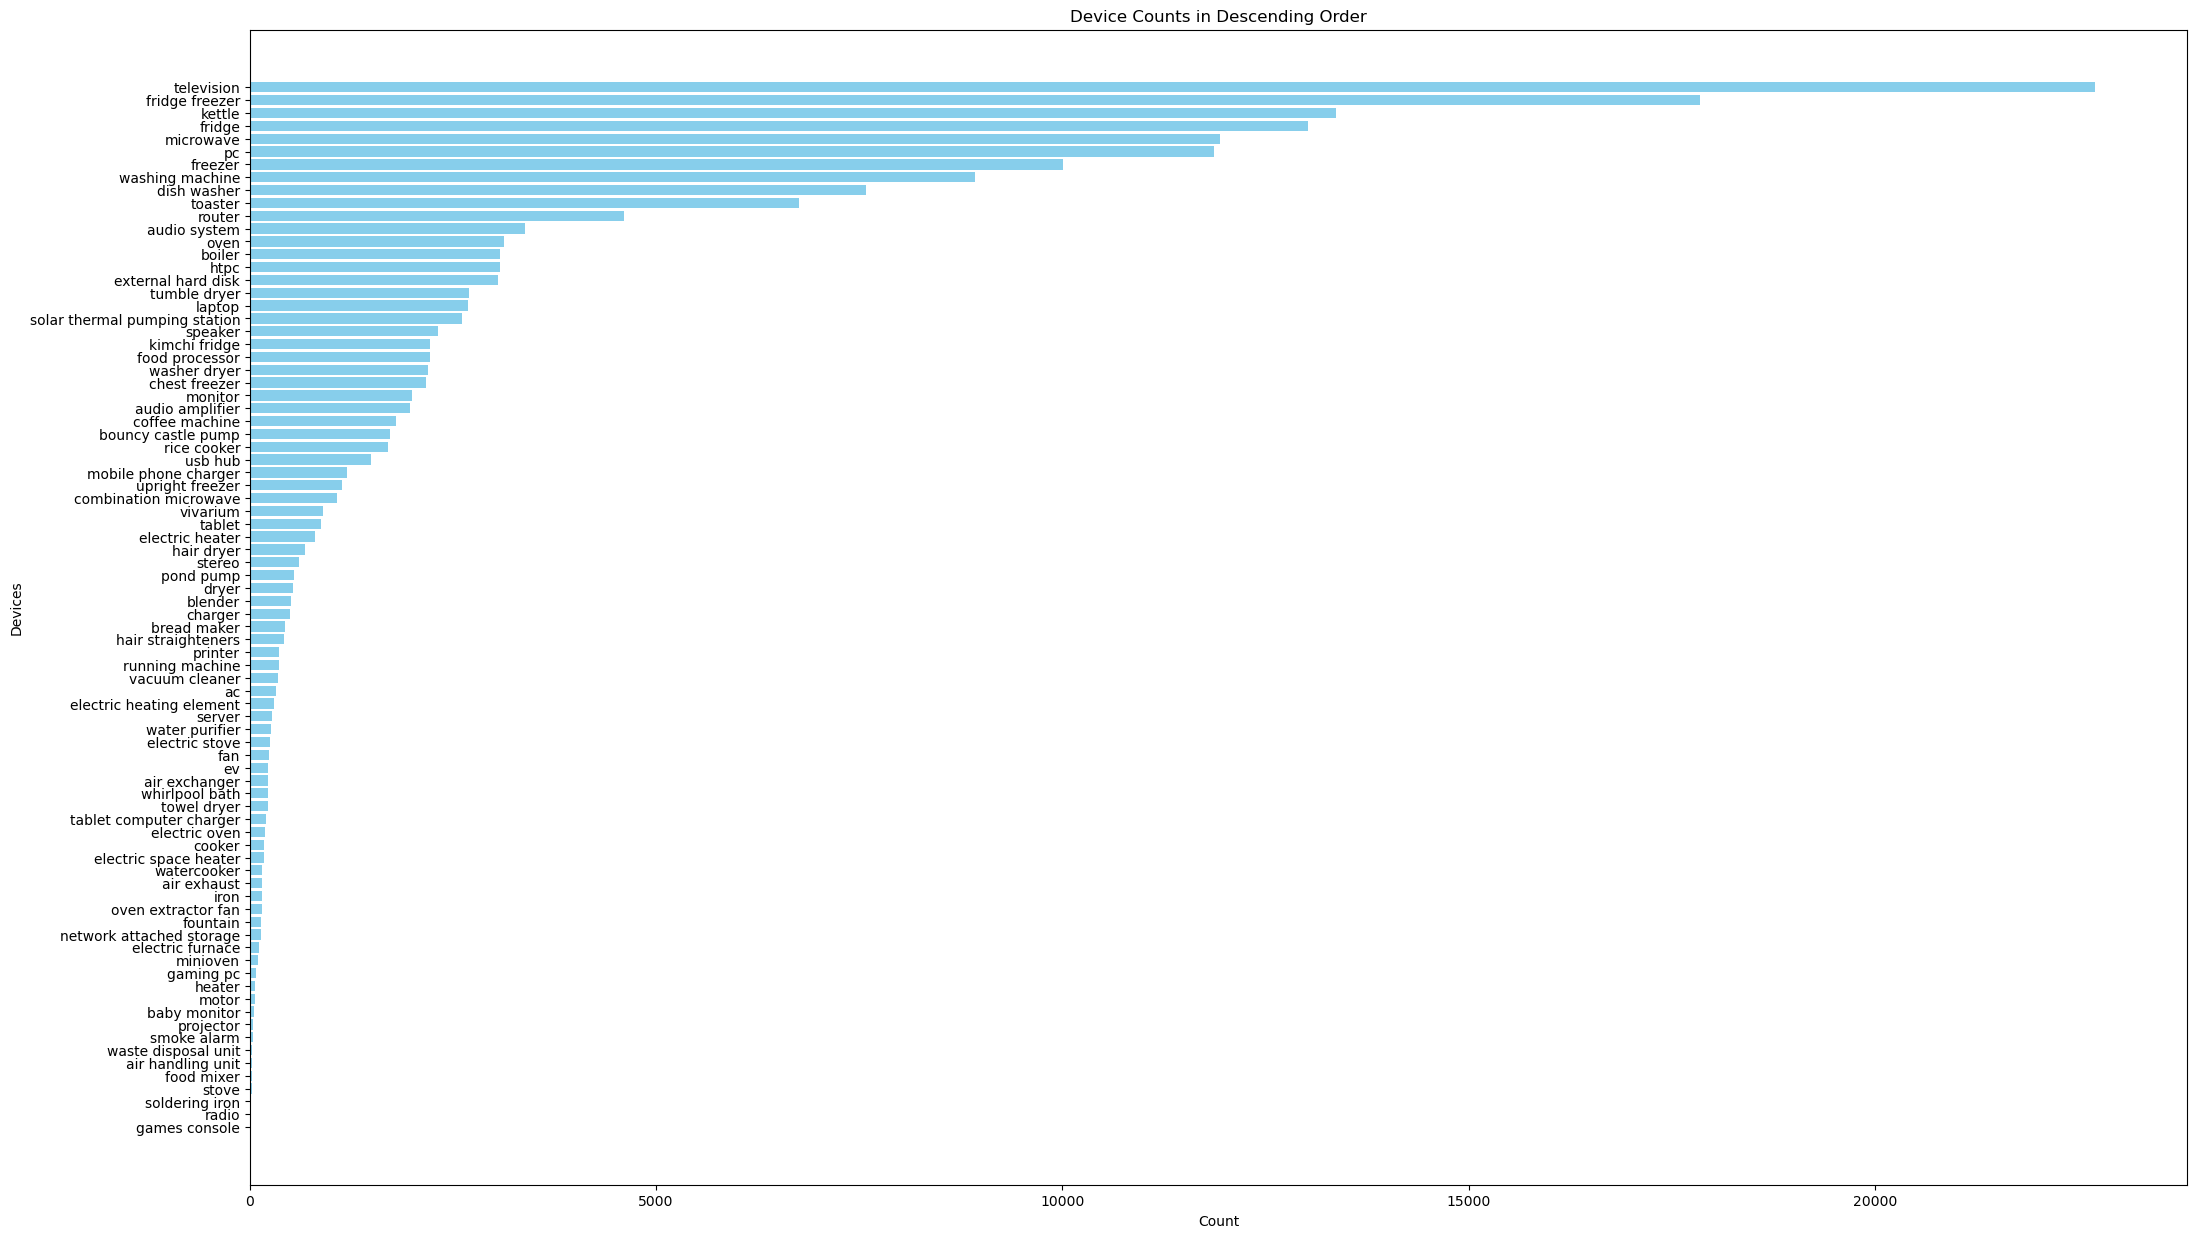

In [23]:
import matplotlib.pyplot as plt
devices_processed = pd.read_pickle("./Energy_graph/data/training_data/synthetic/devices_processed_2700_new.pkl")
# Extract device names and their lengths
device_names = list(devices_processed.keys())
lengths = [len(devices_processed[device]) for device in device_names]

# Sort them based on lengths in descending order
sorted_indices = sorted(range(len(lengths)), key=lambda k: lengths[k], reverse=True)
sorted_device_names = [device_names[i] for i in sorted_indices]
sorted_lengths = [lengths[i] for i in sorted_indices]

plt.figure(figsize=(25, 15))
# Plotting
plt.barh(sorted_device_names, sorted_lengths, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Devices')
plt.title('Device Counts in Descending Order')
plt.gca().invert_yaxis()  # This is to have the device with the highest count at the top
plt.show()


In [4]:
devices_processed = pd.read_pickle("./Energy_graph/data/training_data/synthetic/devices_processed_2700.pkl")

In [13]:
sorted_device_names = [device_names[i] for i in sorted_indices]
sorted_lengths = [lengths[i] for i in sorted_indices]

for i in range(len(sorted_device_names)):
    print(sorted_device_names[i], sorted_lengths[i])

NameError: name 'sorted_indices' is not defined

#### Ideal sum(devices) = aggregate

In [19]:
num_windows = 100000
count_full = 0
# window_len = 6
# random.seed(42)
device_list = pd.read_pickle("./Energy_graph/data/labels_new.pkl")
windows = []
for i in tqdm(range(num_windows)):
    nm_device = sample_normal_within_range()
    selected_devices = (random.sample(device_list, nm_device))
    # print(selected_devices)
   
    df = pd.DataFrame()
    for device in selected_devices:
        curr_df = devices_processed[device][random.randint(0, len(devices_processed[device]) - 1)]
        
        
        while curr_df.max().max() == 0:
            curr_df = devices_processed[device][random.randint(0, len(devices_processed[device]) - 1)]
        curr_df.columns = [device]
        df = pd.concat([df, curr_df], axis=1)
    df["aggregate"] = df.sum(axis=1)
    count = 0
    while df["aggregate"].median() < 20 or df["aggregate"].mean() < 20:
        count += 1
        if count > 20:
            nm_device = sample_normal_within_range()
            selected_devices = (random.sample(device_list, nm_device))
            count = 0
        df = pd.DataFrame()
        for device in selected_devices:
            curr_df = devices_processed[device][random.randint(0, len(devices_processed[device]) - 1)]
            
            
            while curr_df.max().max() == 0:
                curr_df = devices_processed[device][random.randint(0, len(devices_processed[device]) - 1)]
            curr_df.columns = [device]
            df = pd.concat([df, curr_df], axis=1)
        df["aggregate"] = df.sum(axis=1)
   

    for c in df.columns:
        if c == "aggregate":
            continue

        df[c] = (df[c] > 5).astype(int)
    windows.append(df)

print(count_full/num_windows)

100%|██████████| 100000/100000 [13:49<00:00, 120.52it/s]

0.0


In [20]:
# save to pickle
with open("./Energy_graph/data/training_data/synthetic/synthetic_100k_2700_new.pkl", "wb") as f:
    pickle.dump(windows, f, protocol=pickle.HIGHEST_PROTOCOL)

#### sum(devices) < aggregate (unmetered)

In [31]:
num_windows = 50000
count_full = 0
# window_len = 6
# random.seed(42)
device_list = pd.read_pickle("./Energy_graph/labeles.pkl")
windows = []
for i in tqdm(range(num_windows)):
    nm_device = sample_normal_within_range()
    selected_devices = (random.sample(device_list, nm_device))
    # print(selected_devices)
   
    df = pd.DataFrame()
    for device in selected_devices:
        curr_df = devices_processed[device][random.randint(0, len(devices_processed[device]) - 1)]
        
        
        while curr_df.max().max() == 0:
            curr_df = devices_processed[device][random.randint(0, len(devices_processed[device]) - 1)]
        curr_df.columns = [device]
        df = pd.concat([df, curr_df], axis=1)
    df["aggregate"] = df.sum(axis=1)
    count = 0
    while df["aggregate"].median() < 20 or df["aggregate"].mean() < 20:
        count += 1
        if count > 20:
            nm_device = sample_normal_within_range()
            selected_devices = (random.sample(device_list, nm_device))
            count = 0
        df = pd.DataFrame()
        for device in selected_devices:
            curr_df = devices_processed[device][random.randint(0, len(devices_processed[device]) - 1)]
            
            
            while curr_df.max().max() == 0:
                curr_df = devices_processed[device][random.randint(0, len(devices_processed[device]) - 1)]
            curr_df.columns = [device]
            df = pd.concat([df, curr_df], axis=1)
        df["aggregate"] = df.sum(axis=1)
   
    # pick random 4-5 devices and add them to the aggregate consumption
    nm_device = sample_normal_within_range(mu=4, sigma=1, a=2, b=6)
    selected_devices = (random.sample(device_list, nm_device))
    unmetered = pd.DataFrame(0, index=range(len(curr_df)), columns=['aggregate'])
    for device in selected_devices:
        curr_df = devices_processed[device][random.randint(0, len(devices_processed[device]) - 1)]
        while curr_df.max().max() == 0:
            curr_df = devices_processed[device][random.randint(0, len(devices_processed[device]) - 1)]
        curr_df.columns = [device]
        unmetered['aggregate'] += curr_df[device]
    # add the unmetered devices to the aggregate consumption
    df["aggregate"] =  df["aggregate"] + unmetered["aggregate"]

    for c in df.columns:
        if c == "aggregate":
            continue

        df[c] = (df[c] > 5).astype(int)
    windows.append(df)

print(count_full/num_windows)
# save to pickle
with open("./Energy_graph/data/training_data/synthetic/synthetic_50k_2700_unmetered.pkl", "wb") as f:
    pickle.dump(windows, f, protocol=pickle.HIGHEST_PROTOCOL)

100%|██████████| 50000/50000 [08:18<00:00, 100.26it/s]


0.0


In [21]:
labels = pd.read_pickle("./Energy_graph/data/labels_new.pkl")
windows = pd.read_pickle("./Energy_graph/data/training_data/synthetic/synthetic_100k_2700_new.pkl")
upper_bound = pd.Timedelta(seconds=32)
max_gap = pd.Timedelta(seconds=3600)
X_Y_test= []
skip_count_1 = 0
skip_count_2 = 0
total_count = 0
for window in tqdm(windows):
    
    x = window["aggregate"].values
    devices = [False] * len(labels)
    for c in window.columns:
        if c == "aggregate":
            continue
        on = (window[c] > 0)
        ix = labels.index(c)
        # print(window[c])
        # print(on.any())
        devices[ix] = on.any()

    X_Y_test.append((x, devices))

# print("Total windows: ", total_count, "Skipped windows due to 30min gap: ", skip_count_1, "Skipped windows due to 4 gaps of 32s or more: ", skip_count_2 ,"Procentage skipped: ", (skip_count_1+skip_count_2) / total_count * 100)

# save to pickle
import pickle
with open("./Energy_graph/data/training_data/synthetic/synthetic_test_100k_2700_new.pkl", "wb") as f:
    pickle.dump(X_Y_test, f, protocol=pickle.HIGHEST_PROTOCOL)

100%|██████████| 100000/100000 [02:12<00:00, 755.33it/s]


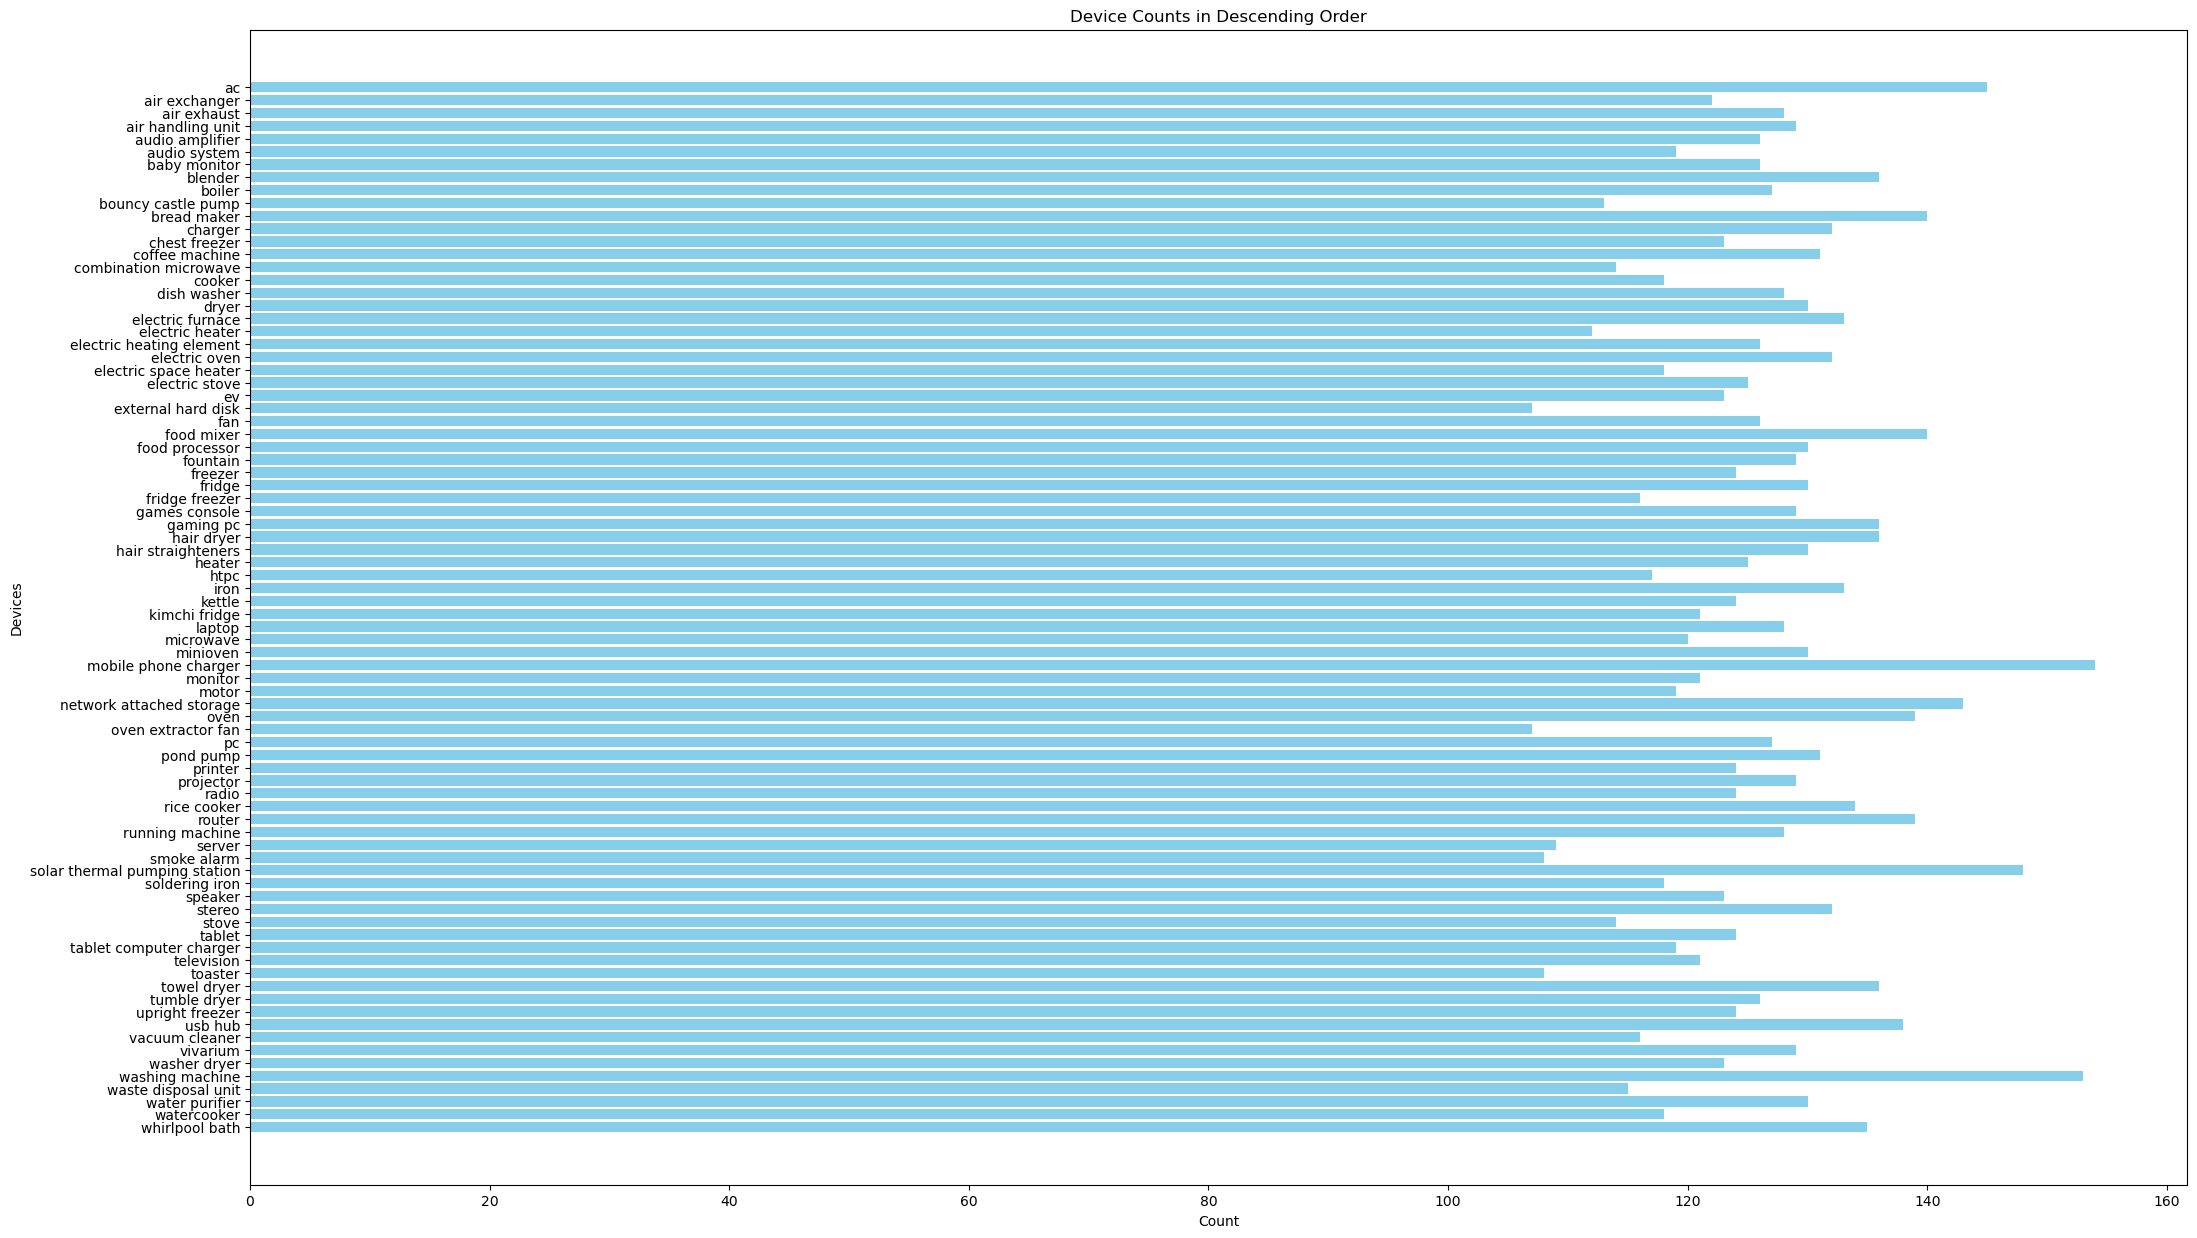

In [20]:
# appearnces
labels = pd.read_pickle("./Energy_graph/labeles.pkl")
appearances = [0] * len(labels)
for house in windows:
    for device in house:
        if device == "aggregate":
            continue
        if device in labels:
            appearances[labels.index(device)] += 1
        else:
            print(device)
            print("not in labels")
            break


plt.figure(figsize=(25, 15))
# Plotting
plt.barh(labels, appearances, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Devices')
plt.title('Device Counts in Descending Order')
plt.gca().invert_yaxis()  # This is to have the device with the highest count at the top
plt.show()

    

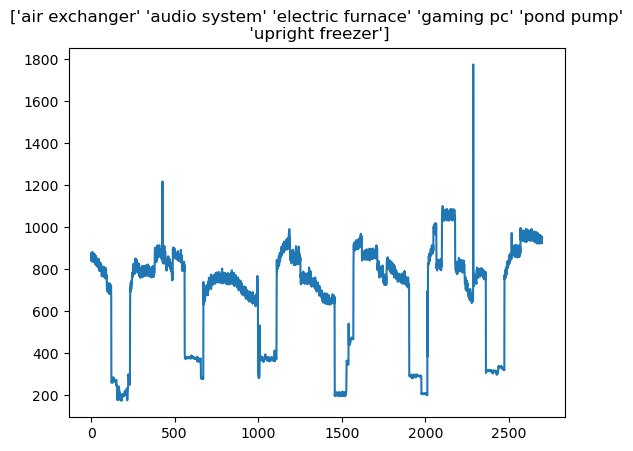

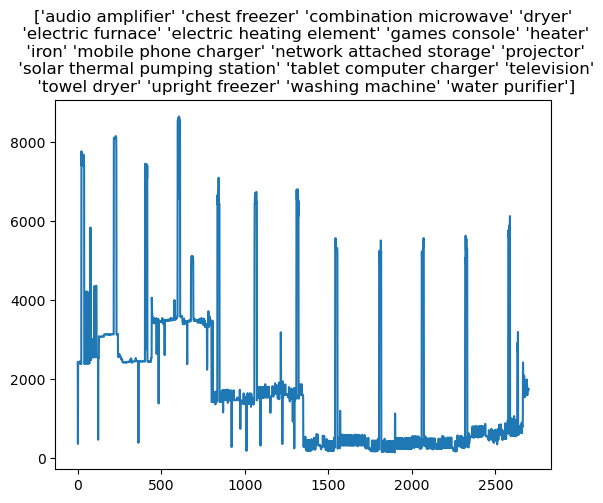

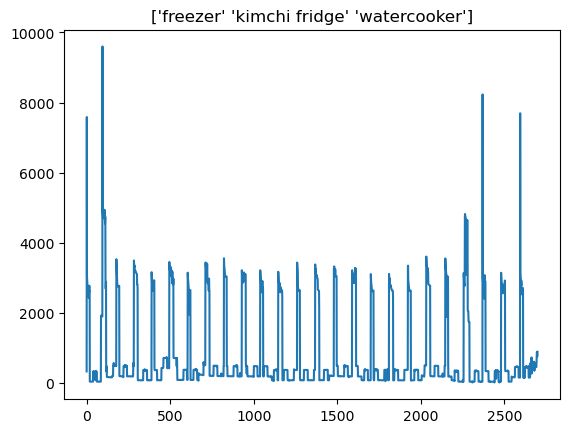

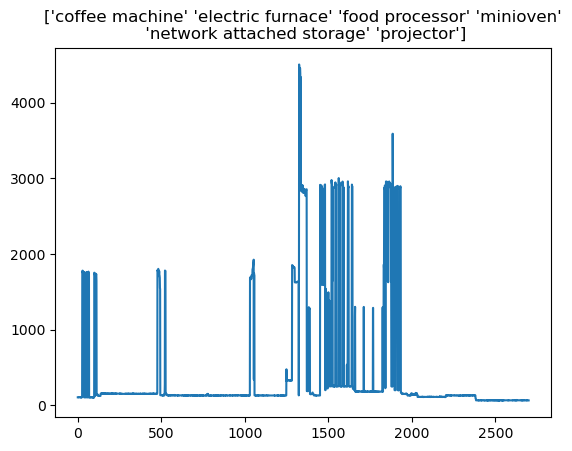

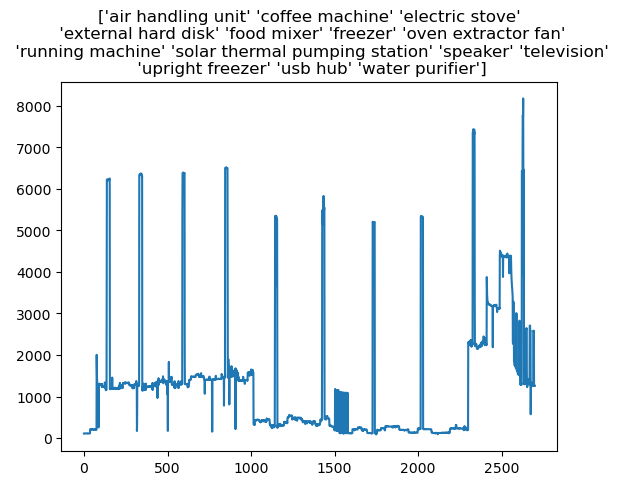

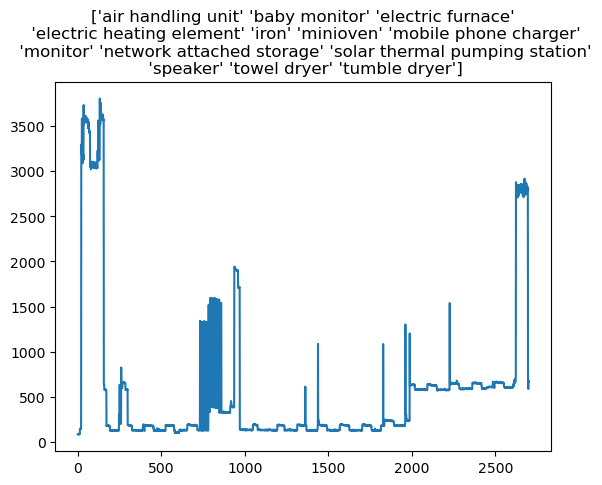

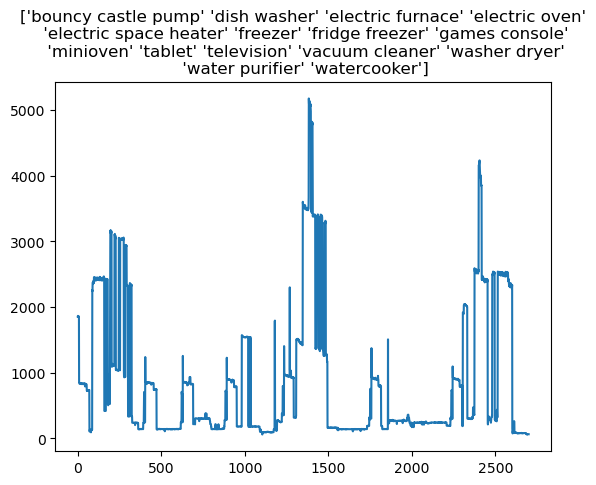

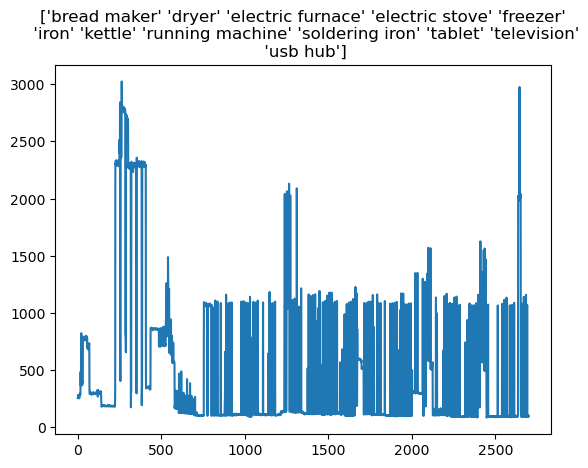

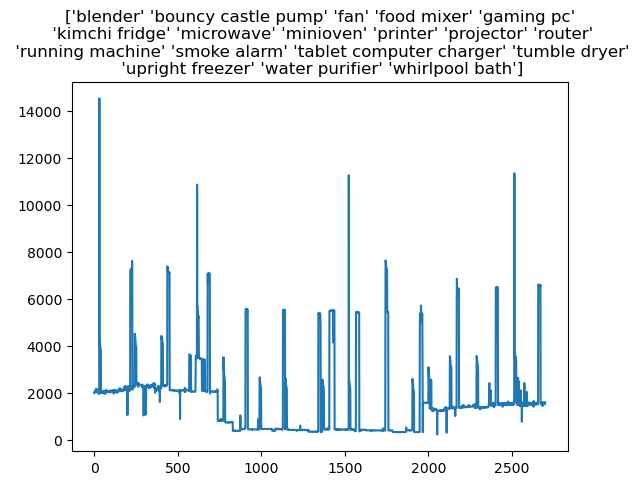

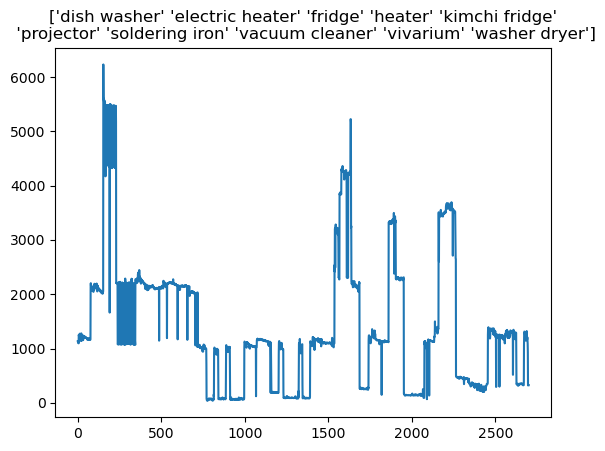

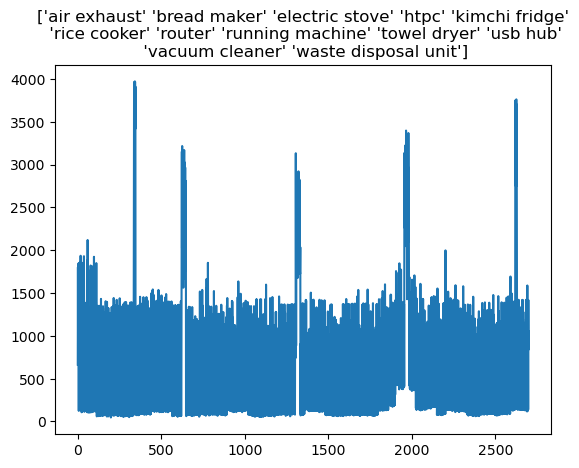

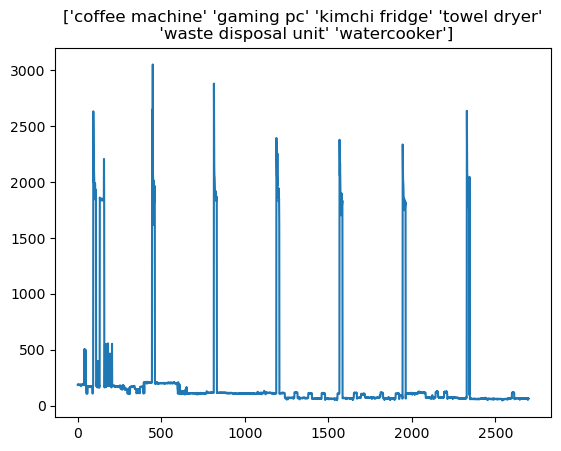

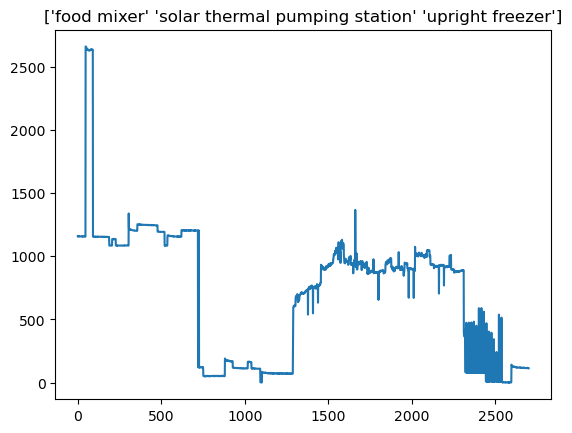

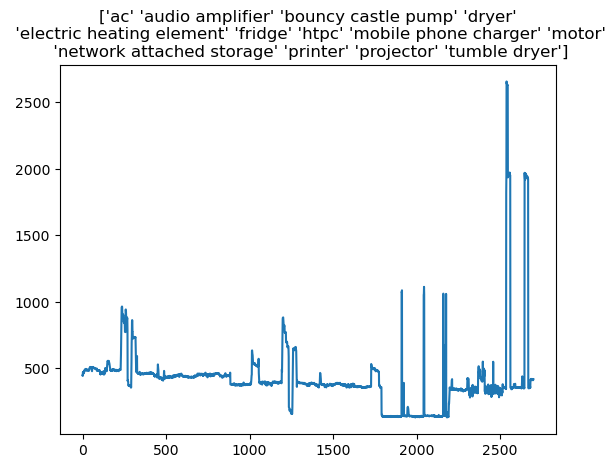

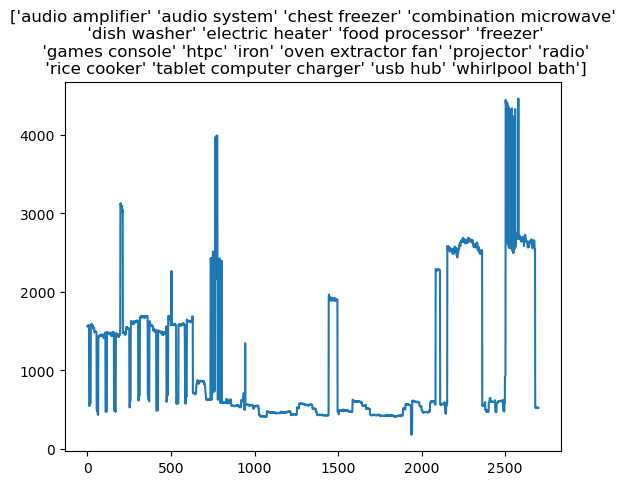

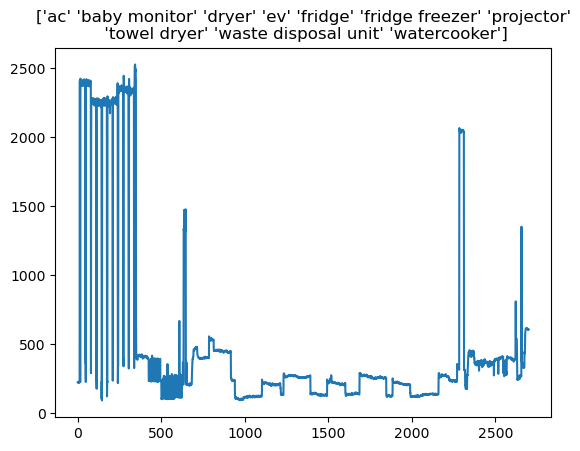

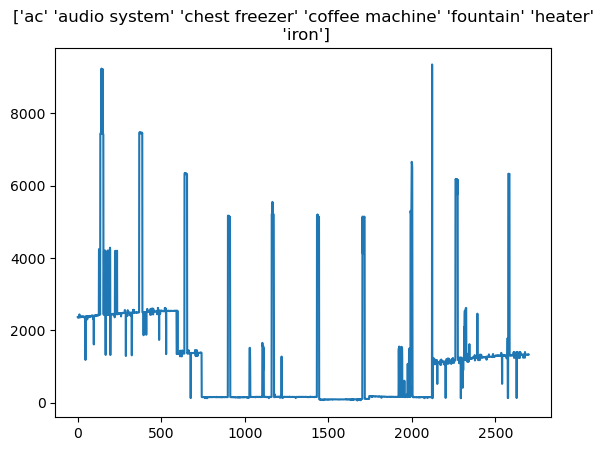

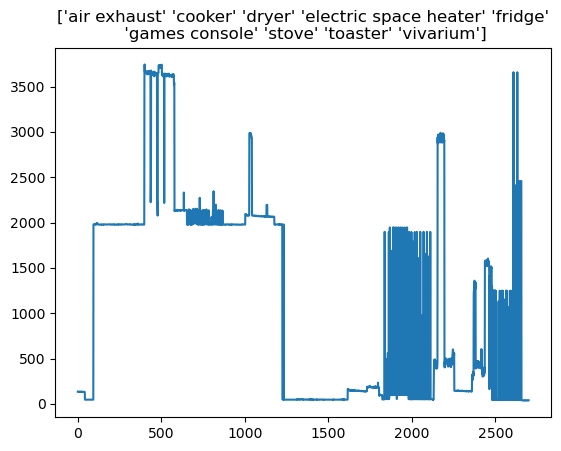

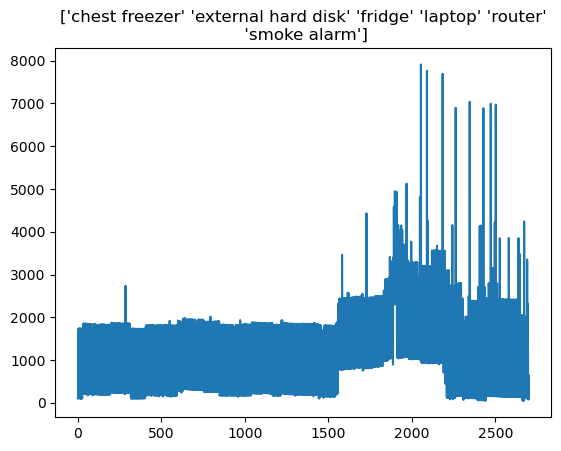

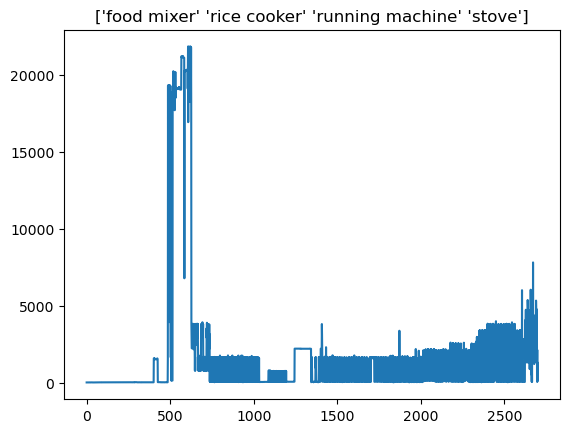

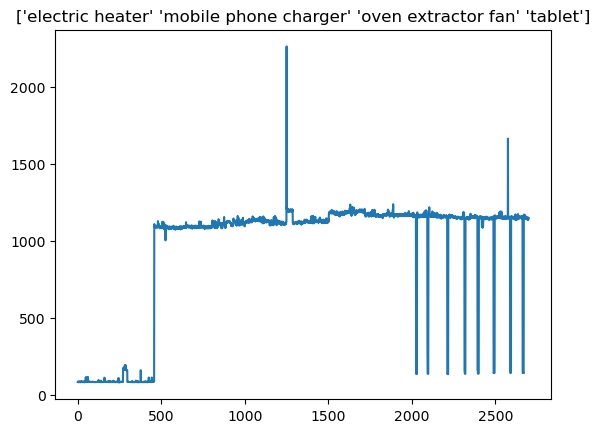

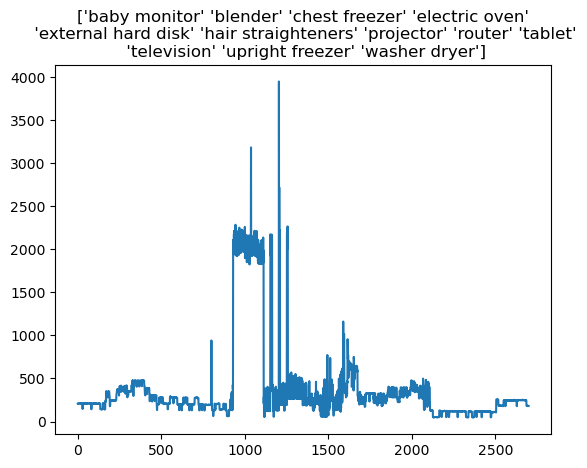

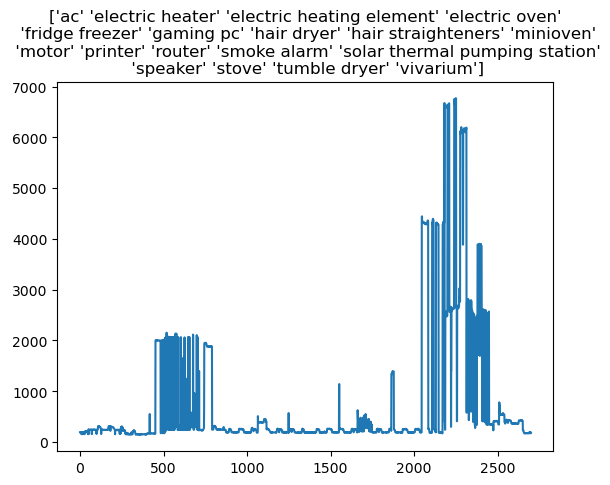

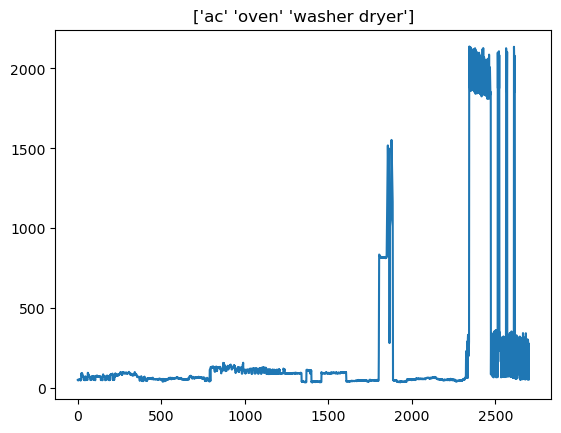

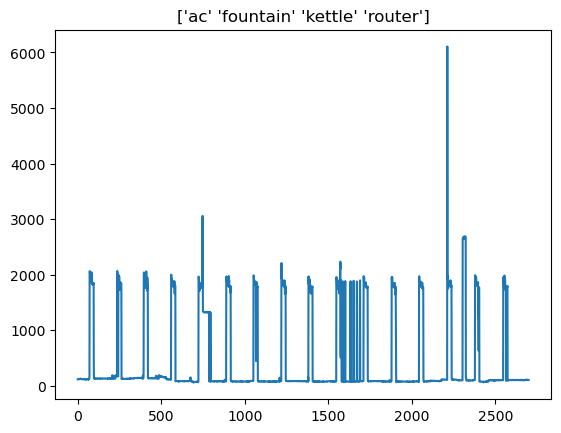

In [21]:
# X_Y_test = pd.read_pickle("./Energy_graph/data/processed_all_X_Y_watts.pkl")
# plt.plot(X_Y_test[0][0])

indicies = random.sample(range(len(X_Y_test)), 25)
# print(indicies)
labels_np = np.array(labels)
for i in indicies:
    plt.plot(X_Y_test[i][0])
    # TODO print used devices
    # print(len(labels_np[X_Y_test[i][1]]))
    # print("*****************")
    plt.title(str(labels_np[X_Y_test[i][1]]))
    plt.show()



array(['washing machine', 'iron', 'microwave', 'stove oven',
       'chest freezer', 'audio system', 'gaming pc', 'fan',
       'tablet computer charger', 'bouncy castle pump'], dtype='<U29')

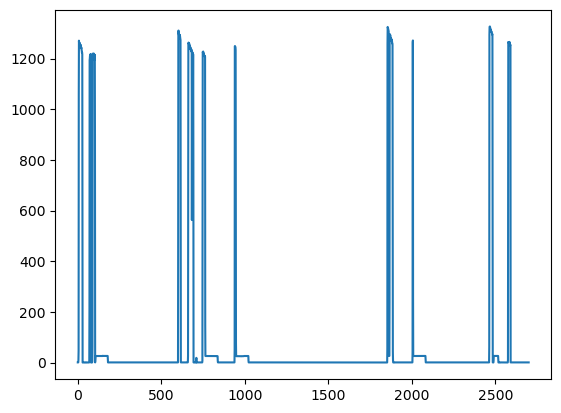

In [162]:
plt.plot(X_Y_test[20][0])
pd.DataFrame(X_Y_test[20][0])
labels_np[X_Y_test[20][1]]

### Adding underepresented classes to the existing data and removing overrepresented classes

In [61]:
X_Y_test = pd.read_pickle("./Energy_graph/data/processed_all_values.pkl")


In [63]:
X_Y_test["REFIT_2"]

,aggregate,fridge freezer,washing machine,dish washer,television,microwave,toaster,audio system,kettle,oven extractor fan
Time,,,,,,,,,,
2013-09-17 22:08:08,0.001544,0.000196,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-09-17 22:08:16,0.001542,0.000196,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-09-17 22:08:24,0.001542,0.000196,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-09-17 22:08:32,0.001560,0.000196,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-09-17 22:08:40,0.001556,0.000196,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2015-05-28 08:05:04,0.000696,0.000182,0.000367,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-05-28 08:05:12,0.000729,0.000182,0.000062,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-05-28 08:05:20,0.000740,0.000180,0.000062,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Preprocessing

### Functions

In [4]:
# def preprocess_string(string : str) -> str:
#     string = string.lower().strip()
#     string = re.sub(' +', ' ', string)
#     string = string.replace("_", " ")
#     string = string.replace("-", " ")
#     string = string.replace("&", " ")
#     string = string.split("(")[0]
#     string = string.split("#")[0]

#     string = string.strip()

#     # handle known synoynms
#     synonyms = {
#         "refrigerator": "fridge",
#         "vaccumcleaner": "vacuum cleaner",
#         "breadmaker": "bread maker",
      
        
#     }
#     if string in synonyms:
#         string = synonyms[string]

#     if 'hi fi' in string:
#         string = "audio system"

#     if "router" in string:
#         string = "router"

#     if "treadmill" in string:
#         string = "running machine"
        

#     if "laptop" in string:
#         string = "laptop"
    
#     if "server" in string:
#         string = "server"

#     if "monitor" in string and not "baby" in string:
#         string = "monitor"
#     # special cases
#     if "computer" in string and "charger" not in string:
#         string = "pc"

#     if "tv" in string:
#         string = "television"

#     if "television" in string:
#         string = "television"

#     if "macbook" in string:
#         string = "laptop"
        
#     if "car charger" == string:
#         string = "ev"
    
#     if "toast" in string:
#         string = "toaster"
    
#     if "modem" in string:
#         string = "router"

#     # we treat all audio devices as speakers so subwoofer is also a speaker
#     if "subwoofer" in string:
#         string = "speaker"

#     if "speaker" in string:
#         string = "speaker"

#     if "iron" in string and "soldering" not in string:
#         string = "iron"

    
#     if "coffeemachine" in string:
#         string = "coffee machine"
#     if "coffee maker" in string:
#         string = "coffee machine"

#     if "dishwasher" in string:
#         string = "dish washer"
#     if "air conditioner" in string:
#         string = "ac"

#     if "air conditioning" in string:
#         string = "ac"
    
#     string = re.sub(' +', ' ', string)
#     string = re.sub(r'\d+', '', string)
#     return string.strip()


def preprocess_string(string : str) -> str:
    string = string.lower().strip()
    string = re.sub(' +', ' ', string)
    string = string.replace("_", " ")
    string = string.replace("-", " ")
    string = string.replace("&", " ")
    string = string.split("(")[0]
    string = string.split("#")[0]

    string = string.strip()

    # handle known synoynms
    synonyms = {
        "refrigerator": "fridge",
        "vaccumcleaner": "vacuum cleaner",
        "breadmaker": "bread maker",
      
        
    }
    if "freezer" in string:
        string = "fridge"

    if string in synonyms:
        string = synonyms[string]

    if 'hi fi' in string:
        string = "audio system"

    if "router" in string:
        string = "router"

    if "treadmill" in string:
        string = "running machine"
        

    if "laptop" in string:
        string = "laptop"
    
    if "server" in string:
        string = "server"

    if "monitor" in string and not "baby" in string:
        string = "monitor"
    # special cases
    if "computer" in string and "charger" not in string:
        string = "pc"

    if "tv" in string:
        string = "television"

    if "television" in string:
        string = "television"

    if "macbook" in string:
        string = "laptop"
        
    if "car charger" == string:
        string = "ev"
    
    if "toast" in string:
        string = "toaster"
    
    if "modem" in string:
        string = "router"

    # we treat all audio devices as speakers so subwoofer is also a speaker
    if "subwoofer" in string:
        string = "speaker"

    if "speaker" in string:
        string = "speaker"

    if "iron" in string and "soldering" not in string:
        string = "iron"

    
    if "coffeemachine" in string:
        string = "coffee machine"
    if "coffee maker" in string:
        string = "coffee machine"

    if "dishwasher" in string:
        string = "dish washer"
    if "air conditioner" in string:
        string = "ac"

    if "air conditioning" in string:
        string = "ac"
    
    string = re.sub(' +', ' ', string)
    string = re.sub(r'\d+', '', string)
    return string.strip()

def process_dictionary(data: dict) -> pd.DataFrame:

    ignored_devices = [
        "light",
        "outlet",
        "sockets",
        "lamp",
        "plug",
        'CE appliance'
        'kettle/toaster',
        'dehumidifier/heater',
        'HairDryer-Straightener',
        'Office Desk',
        'heat basement',
        'set top box',
        'subpanel',
    ]
    dfs = []

    for device in data:
        # ignore devices
        if any(ignored_device in device.lower() for ignored_device in ignored_devices):
            continue
        # preprocess device name
        
        device_name = preprocess_string(device)
        
        df = data[device]
        # rename column to standardized device name
        df.columns = [device_name]
        if df.max().max() < 2:
            print("device with zeros: ", device_name)
            continue

        time_diffs = df.index.to_series().diff()
        median_interval = time_diffs.median()

        # if there is less than 3 days of data drop the device
        if len(df) < (3*24 * 60 * 60) / median_interval.total_seconds():
            print("less than 3 days of data for device: ", device_name)
            continue
        dfs.append(df)

    # concatenate all dataframes
    df = pd.concat(dfs, axis=1)

    # resample to 8s
    df = df.resample("8s").fillna(method="nearest", limit=4)

    # check for gaps in data TODO do this in 

    # drop rows with NaN values
    df.dropna(inplace=True)

    # put 1 if device is on and 0 if device is off
    for c in df.columns:
        if c == "aggregate":
            continue

        df[c] = (df[c] > 5).astype(int)

    column_counts = Counter(df.columns)
    duplicates = [col for col, count in column_counts.items() if count > 1]
    # Sum duplicate columns
    for duplicate in duplicates:
        duplicate_cols = [col for i, col in enumerate(df.columns) if col == duplicate]
        df[duplicate] = df[duplicate_cols].sum(axis=1)
        # Drop other duplicate columns if needed
        df = df.loc[:, ~df.columns.duplicated(keep='last')]
    
    
    return df
    


def process_dataset(dataset_path):
    data = pd.read_pickle(dataset_path)
    # print(dataset_path)
    for house in data:
        data[house] = process_dictionary(data[house])
        
    return data








        


### Processing

#### Serial

In [ ]:

# Serial code
path = "./Energy_graph/data/processed_watts/"
processed_data = {}
for dataset in tqdm(os.listdir(path)):
    if not dataset.endswith(".pkl"):
        continue
    
    data = pd.read_pickle(path + dataset)

    # print("processing dataset: ", dataset)
    for house in data:
        data[house] = process_dictionary(data[house])

    processed_data.update(data)
    
    

#### Parallel

In [3]:
import concurrent.futures
import multiprocessing

path = "./Energy_graph/data/processed_watts/"
dataset_paths = [os.path.join(path, dataset) for dataset in os.listdir(path) if dataset.endswith('.pkl')]
    
cpu_count = int(os.cpu_count() / 2)
data_dict = {}

with tqdm(total=len(dataset_paths), desc="Processing datasets", unit="dataset") as progress_bar:
    with concurrent.futures.ProcessPoolExecutor(max_workers=cpu_count) as executor:
        futures = {executor.submit(process_dataset, dataset_path): dataset_path for dataset_path in dataset_paths}
        
        for future in concurrent.futures.as_completed(futures):
            dataset_path = futures[future]
            try:
                processed_data = future.result()
                data_dict.update(processed_data)
            except Exception as e:
                print(f"Dataset {dataset_path} generated an exception: {e}")
            
            progress_bar.update(1)


Processing datasets:   0%|          | 0/10 [00:00<?, ?dataset/s]

less than 3 days of data for device:  washing machine
less than 3 days of data for device:  iron


Processing datasets:  30%|███       | 3/10 [00:05<00:10,  1.57s/dataset]

less than 3 days of data for device:  games console
device with zeros:  radio


Processing datasets:  50%|█████     | 5/10 [00:07<00:05,  1.14s/dataset]

less than 3 days of data for device:  iron


Processing datasets: 100%|██████████| 10/10 [07:39<00:00, 45.98s/dataset] 


In [5]:
data_dict["HES_1"]

,dish washer,running machine,ev,microwave,fridge,air exchanger,oven,whirlpool bath,washing machine,ac,dryer,towel dryer,aggregate
date,,,,,,,,,,,,,
2018-05-12 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0.007336
2018-05-12 00:00:08,0,0,0,0,0,0,0,0,0,0,0,0,0.007346
2018-05-12 00:00:16,0,0,0,0,0,0,0,0,0,0,0,0,0.007360
2018-05-12 00:00:24,0,0,0,0,0,0,0,0,0,0,0,0,0.007360
2018-05-12 00:00:32,0,0,0,0,0,0,0,0,0,0,0,0,0.007527
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-30 23:59:20,0,0,0,0,0,0,0,0,0,0,0,0,0.003026
2018-09-30 23:59:28,0,0,0,0,0,0,0,0,0,0,0,0,0.003066
2018-09-30 23:59:36,0,0,0,0,0,0,0,0,0,0,0,0,0.003121


In [15]:
data_dict["REFIT_1"][:60]

,aggregate,fridge,chest freezer,upright freezer,tumble dryer,washing machine,dish washer,pc,television,electric heater
Time,,,,,,,,,,
2013-10-09 13:06:16,523.0,74.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,1.0
2013-10-09 13:06:24,526.0,75.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,1.0
2013-10-09 13:06:32,526.0,75.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,1.0
2013-10-09 13:06:40,540.0,74.0,0.0,68.0,0.0,0.0,0.0,0.0,0.0,1.0
2013-10-09 13:06:48,540.0,74.0,0.0,68.0,0.0,0.0,0.0,0.0,0.0,1.0
2013-10-09 13:06:56,532.0,74.0,0.0,68.0,0.0,0.0,0.0,0.0,0.0,1.0
2013-10-09 13:07:04,532.0,74.0,0.0,68.0,0.0,0.0,0.0,0.0,0.0,1.0
2013-10-09 13:07:12,540.0,74.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,1.0
2013-10-09 13:07:20,539.0,74.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
#  save to pickle
with open("./Energy_graph/data/processed_all_watts.pkl", "wb") as f:
    pickle.dump(data_dict, f, pickle.HIGHEST_PROTOCOL)
    


In [5]:
data = pd.read_pickle("./Energy_graph/data/processed_all_watts.pkl")
labels = pd.read_pickle("./Energy_graph/data/labels_new.pkl")
labels


['pc',
 'coffee machine',
 'electric stove',
 'server',
 'running machine',
 'electric oven',
 'iron',
 'toaster',
 'monitor',
 'network attached storage',
 'speaker',
 'television',
 'washer dryer',
 'microwave',
 'kettle',
 'audio amplifier',
 'games console',
 'hair dryer',
 'fridge',
 'dish washer',
 'vacuum cleaner',
 'cooker',
 'laptop',
 'router',
 'washing machine',
 'rice cooker',
 'external hard disk',
 'audio system',
 'fan',
 'tablet computer charger',
 'soldering iron',
 'radio',
 'usb hub',
 'printer',
 'htpc',
 'oven',
 'baby monitor',
 'mobile phone charger',
 'bouncy castle pump',
 'solar thermal pumping station',
 'hair straighteners',
 'charger',
 'boiler',
 'food processor',
 'bread maker',
 'projector',
 'electric space heater',
 'kimchi fridge',
 'water purifier',
 'ac',
 'motor',
 'minioven',
 'watercooker',
 'heater',
 'gaming pc',
 'tumble dryer',
 'electric heater',
 'food mixer',
 'vivarium',
 'pond pump',
 'dryer',
 'blender',
 'oven extractor fan',
 'combin

In [6]:
# to ensure the order of the labels is always the same
labels.sort()

In [7]:
len(labels)

78

In [8]:
time_window = 2700 # this is rows so 2550 * 8s = 5h35m
windows = []
upper_bound = pd.Timedelta(seconds=32)
max_gap = pd.Timedelta(seconds=3600)
X_Y = [] # list of tuples (X, Y)
skip_count_1 = 0
skip_count_2 = 0
total_count = 0

for df in tqdm(data.values()):
    for i in range(0, len(df) - time_window, time_window + 1):
        window = df.iloc[i:i + time_window]
        total_count += 1
        # if there is a gap of more than 30 min or 15 gaps of 32 seconds or more in the window skip it
        time_diffs = window.index.to_series().diff().dropna()
        if  (time_diffs >= max_gap).any():
            skip_count_1 += 1
            continue
        if len(time_diffs[time_diffs > upper_bound]) > 15:
            # print(len(time_diffs[time_diffs > upper_bound]))
            skip_count_2 += 1
            continue
        x = window["aggregate"].values
        devices = [False] * len(labels)
        for c in window.columns:
            if c == "aggregate":
                continue
            on = (window[c] > 0)
            ix = labels.index(c)
            # print(window[c])
            # print(on.any())
            devices[ix] = on.any()

        X_Y.append((x, devices))
        


        windows.append(window)
    # break

# X_Y[9][1].count(False)
print("Total windows: ", total_count, "Skipped windows due to 30min gap: ", skip_count_1, "Skipped windows due to 15 gaps of 32s or more: ", skip_count_2 ,"Procentage skipped: ", (skip_count_1+skip_count_2) / total_count * 100)


100%|██████████| 64/64 [01:17<00:00,  1.21s/it]

Total windows:  47867 Skipped windows due to 30min gap:  678 Skipped windows due to 15 gaps of 32s or more:  133 Procentage skipped:  1.6942778950007311


In [10]:
len(labels)

82

In [9]:
# save to pickle
with open("./Energy_graph/data/processed_all_X_Y_watts.pkl", "wb") as f:
    pickle.dump(X_Y, f, pickle.HIGHEST_PROTOCOL)

In [154]:
for f in os.listdir("./Energy_graph/data/training_data/"):
    if not f.endswith(".pkl"):
        continue

    data = pd.read_pickle("./Energy_graph/data/training_data/" + f)
    for h in data:
        print(h, len(list(data[h].keys())))
    # print(f, len(list(data.keys())))

IAWE_1 8
SUST2_1 18
REFIT_13 9
REFIT_6 10
REFIT_1 10
REFIT_21 9
REFIT_8 10
REFIT_9 10
REFIT_20 10
REFIT_7 10
REFIT_15 10
REFIT_12 7
REFIT_4 10
REFIT_3 10
REFIT_18 10
REFIT_11 10
REFIT_16 9
REFIT_17 9
REFIT_10 10
REFIT_19 9
REFIT_2 10
REFIT_5 10
DEDDIAG_8 5
ENERTALK_1 5
ENERTALK_18 5
ENERTALK_12 6
ENERTALK_20 4
ENERTALK_15 3
ENERTALK_6 6
ENERTALK_8 5
ENERTALK_2 5
ENERTALK_11 3
ENERTALK_16 2
ENERTALK_5 6
ENERTALK_7 3
ENERTALK_14 2
ENERTALK_13 4
ENERTALK_19 3
ENERTALK_21 5
ENERTALK_0 8
ENERTALK_4 5
ENERTALK_17 6
ENERTALK_10 3
ENERTALK_3 3
ENERTALK_9 5
HES_1 13
ECO_1 8
ECO_6 6
ECO_2 11
ECO_5 8
ECO_4 6
ECO_3 7
REDD_1 8
REDD_2 7
REDD_3 8
REDD_4 7
REDD_5 8
REDD_6 8
HEART_33 10
HEART_7 10
DRED_1 11
UKDALE_5 22
UKDALE_2 18
UKDALE_1 36
UKDALE_3 5
